In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set up canvas dimensions and initialize with white (RGB: 1,1,1)
canvas_height, canvas_width = 700, 1700
canvas = np.ones((canvas_height, canvas_width, 3), dtype=float) 

# Pixel plotting function for setting pixels to red
def set_circle(x, y, color=(1, 0, 0)):  # Default color set to red (1, 0, 0)
    if 0 <= x < canvas_width and 0 <= y < canvas_height:
        canvas[y, x] = color  # Set the pixel to red
        
def set_pixel(x, y):
    if 0 <= x < canvas_width and 0 <= y < canvas_height:
        canvas[y, x] = (0,0,0)  # Set pixel to black

In [2]:
# Drawing circle symmetry points
def draw_circle(xc, yc, x, y):
    set_circle(xc + x, yc + y)
    set_circle(xc - x, yc + y)
    set_circle(xc + x, yc - y)
    set_circle(xc - x, yc - y)
    set_circle(xc + y, yc + x)
    set_circle(xc - y, yc + x)
    set_circle(xc + y, yc - x)
    set_circle(xc - y, yc - x)

# Bresenham's Circle Algorithm
def bresenham_circle(x_center, y_center, radius):
    x = 0
    y = radius
    d = 3 - 2 * radius
    draw_circle(x_center, y_center, x, y)
    while y >= x:
        x += 1
        if d > 0:
            y -= 1
            d = d + 4 * (x - y) + 10
        else:
            d = d + 4 * x + 6
        draw_circle(x_center, y_center, x, y)

In [3]:
# # Dashed Circle
# def draw_circle(xc, yc, x, y, dash_length=5, gap_length=5, count=[0]):
#     if count[0] % (dash_length + gap_length) < dash_length:
#         set_circle(xc + x, yc + y)
#         set_circle(xc - x, yc + y)
#         set_circle(xc + x, yc - y)
#         set_circle(xc - x, yc - y)
#         set_circle(xc + y, yc + x)
#         set_circle(xc - y, yc + x)
#         set_circle(xc + y, yc - x)
#         set_circle(xc - y, yc - x)
#     count[0] += 1

# # Bresenham's Circle Algorithm for Dashed Circle
# def bresenham_circle(x_center, y_center, radius, dash_length=5, gap_length=5):
#     x = 0
#     y = radius
#     d = 3 - 2 * radius
#     count = [0]  # Use a list to keep a mutable count
#     draw_circle(x_center, y_center, x, y, dash_length, gap_length, count)
    
#     while y >= x:
#         x += 1
#         if d > 0:
#             y -= 1
#             d = d + 4 * (x - y) + 10
#         else:
#             d = d + 4 * x + 6
#         draw_circle(x_center, y_center, x, y, dash_length, gap_length, count)


In [4]:
# def bresenham_line(x0, y0, x1, y1):
#     # Calculate the differences in x and y directions
#     dx = abs(x1 - x0)
#     dy = abs(y1 - y0)

#     # Determine the direction of increment for x and y
#     sx = 1 if x1 > x0 else -1
#     sy = 1 if y1 > y0 else -1

#     # Initialize decision variables
#     if dx > dy:
#         dT = 2 * (dy - dx)  # Adjusted error term when stepping in y
#         dS = 2 * dy         # Step size in y when moving in x
#         d = 2 * dy - dx     # Initial decision variable
#         x, y = x0, y0

#         # Loop to iterate over x, adjusting y based on the decision variable
#         while x != x1:
#             set_pixel(x, y)  # Plot the current pixel
#             x += sx  # Move in the x direction
#             if d < 0:
#                 d += dS  # Adjust error for next point
#             else:
#                 y += sy  # Move in the y direction when error threshold is met
#                 d += dT  # Adjust error for slope

#     else:
#         dT = 2 * (dx - dy)  # Adjusted error term when stepping in x
#         dS = 2 * dx         # Step size in x when moving in y
#         d = 2 * dx - dy     # Initial decision variable
#         x, y = x0, y0

#         # Loop to iterate over y, adjusting x based on the decision variable
#         while y != y1:
#             set_pixel(x, y)  # Plot the current pixel
#             y += sy  # Move in the y direction
#             if d < 0:
#                 d += dS  # Adjust error for next point
#             else:
#                 x += sx  # Move in the x direction when error threshold is met
#                 d += dT  # Adjust error for slope

#     # Plot the final point
#     set_pixel(x, y)


In [5]:
def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x1 > x0 else -1  # Step direction for x
    sy = 1 if y1 > y0 else -1  # Step direction for y

    # Handle the case of a vertical line (constant x)
    if dx == 0:
        for y in range(y0, y1 + sy, sy):
            set_pixel(x0, y)
        return

    # Handle the case of a horizontal line (constant y)
    if dy == 0:
        for x in range(x0, x1 + sx, sx):
            set_pixel(x, y0)
        return

    # Decision variables for the Bresenham algorithm
    dT = 2 * (dy - dx)
    dS = 2 * dy
    d = 2 * dy - dx

    x, y = x0, y0
    set_pixel(x, y)

    if dx >= dy:  # Line is more horizontal than vertical
        while x != x1:
            x += sx
            if d < 0:
                d += dS
            else:
                y += sy
                d += dT
            set_pixel(x, y)
    else:  # Line is more vertical than horizontal
        dT = 2 * (dx - dy)  # Recalculate dT and dS for a steep line
        dS = 2 * dx
        d = 2 * dx - dy
        while y != y1:
            y += sy
            if d < 0:
                d += dS
            else:
                x += sx
                d += dT
            set_pixel(x, y)


In [6]:
def bresenham_line_dashed(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    dash_length = 5  # Specifies how many pixels to draw for each dash
    gap_length = 3   # Specifies the number of pixels to skip after each dash
    step = 0         # Counter for the number of pixels in the current dash or gap
    dash_on = True   # Flag indicating whether to draw or skip pixels

    # Determine the direction of movement in x and y
    sx = 1 if x1 > x0 else -1
    sy = 1 if y1 > y0 else -1

    # Decision variables and initial settings for Bresenham's algorithm
    if dx >= dy:  # Line is more horizontal than vertical
        dT = 2 * (dy - dx)
        dS = 2 * dy
        d = 2 * dy - dx
        x, y = x0, y0

        while x != x1 + sx:  # Adjust loop to handle both directions
            if dash_on:
                set_pixel(x, y)
            step += 1
            if step >= (dash_length if dash_on else gap_length):
                step = 0
                dash_on = not dash_on  # Toggle between dash and gap
            x += sx
            if d < 0:
                d += dS
            else:
                y += sy
                d += dT
    else:  # Line is more vertical than horizontal
        dT = 2 * (dx - dy)
        dS = 2 * dx
        d = 2 * dx - dy
        x, y = x0, y0

        while y != y1 + sy:  # Adjust loop to handle both directions
            if dash_on:
                set_pixel(x, y)
            step += 1
            if step >= (dash_length if dash_on else gap_length):
                step = 0
                dash_on = not dash_on  # Toggle between dash and gap
            y += sy
            if d < 0:
                d += dS
            else:
                x += sx
                d += dT

    # Ensure the final point is drawn if it's in a dash segment
    if dash_on:
        set_pixel(x1, y1)


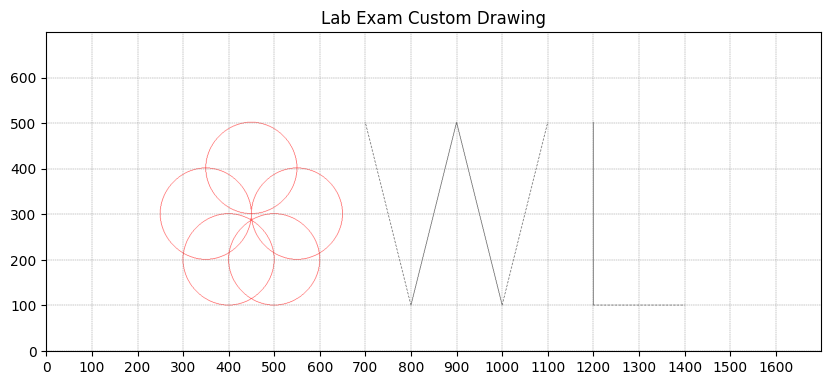

In [7]:
# Main drawing function for Shohid Minar
def display_drawings():
    bresenham_circle(400,200,100)
    bresenham_circle(500,200,100)
    bresenham_circle(350,300,100)
    bresenham_circle(450,400,100)
    bresenham_circle(550,300,100)
    
    bresenham_line_dashed(800, 100,700, 500)
    bresenham_line(800, 100, 900, 500)
    bresenham_line(900, 500,1000, 100)
    bresenham_line_dashed(1000, 100, 1100, 500)

    bresenham_line_dashed(1200, 100, 1400, 100)
    bresenham_line(1200, 100, 1200, 500)
   

    # Display canvas with grid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(canvas, cmap="gray", origin="upper")
    ax.set_xticks(np.arange(0, canvas_width, 100))
    ax.set_yticks(np.arange(0, canvas_height, 100))
    ax.grid(color='gray', linestyle='--', linewidth=0.3)
    ax.set_title("Lab Exam Custom Drawing")
    plt.gca().invert_yaxis()  # Ensures y-axis is oriented upwards
    plt.show()

# Run the drawing function
display_drawings()
